In [1]:
# BIBLIOTECAS
import pandas as pd
import xml.etree.ElementTree as ET
import requests
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
import numpy as np

In [2]:
# WEBSCRAPPING
lista_url = ['01-matthew.xml','02-mark.xml','03-luke.xml','04-john.xml','05-acts.xml','06-romans.xml','07-1corinthians.xml','08-2corinthians.xml','09-galatians.xml',
             '10-ephesians.xml','11-philippians.xml','12-colossians.xml','13-1thessalonians.xml','14-2thessalonians.xml','15-1timothy.xml','16-2timothy.xml',
             '17-titus.xml','18-philemon.xml','19-hebrews.xml','20-james.xml','21-1peter.xml','22-2peter.xml','23-1john.xml','24-2john.xml','25-3john.xml',
             '26-jude.xml','27-revelation.xml']

url = "https://raw.githubusercontent.com/biblicalhumanities/Nestle1904/master/xml/"


for i in lista_url:
    with open(i, 'wb') as file:
        response = requests.get(url + i)
        file.write(response.content)

In [3]:
lista_nt = []
for i in lista_url:
    book = ET.parse(i)
    root = book.getroot()
    for i in root.findall("./chapter/p/w"):
        lista_nt.append(i.text)

In [4]:
df = pd.DataFrame(lista_nt, columns = ['word'])

In [5]:
counts = df.value_counts()

In [12]:
stopwords = set(STOPWORDS)
stopwords.update(['καὶ','ὁ','δὲ','ἐν','τοῦ','εἰς','τὸ','τὸν','τὴν','αὐτοῦ','ὅτι','τῆς','τῶν','τῷ','οἱ','γὰρ','ἡ','μὴ','αὐτῷ','τῇ','τὰ','οὐκ','τοὺς','πρὸς','αὐτὸν','ἵνα','ἐκ','ἐπὶ','οὐ','αὐτοῖς','αὐτῶν','οὖν','μου','διὰ','ἀπὸ','ὡς','ἀλλὰ','Καὶ','εἰ','ἡμῶν','σου','λέγει','τὰς','ἢ','περὶ','ἦν','αὐτόν','κατὰ','με','τοῦτο','ἐξ','ἀλλ','μοι','τε','ὃ','ταῦτα0','οὕτως','ἡμῖν','καθὼς','ὃν','σε','δι’','δέ','ὑπὲρ'])

In [13]:
all_words = " ".join(s for s in lista_nt)

In [ ]:
all_words[0:20]

In [14]:
wordcloud = WordCloud(font_path = 'Symbola.ttf',
                      stopwords = stopwords,
                      background_color = "black",
                      width=1600, height=800).generate(all_words)

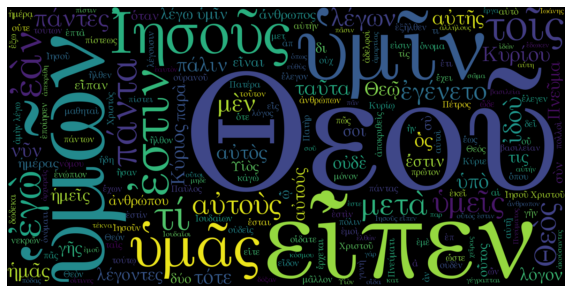

In [15]:
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

In [16]:
wordcloud.to_file("wordcloud.png")

In [17]:
cruz_mask = np.array(Image.open("cruz_3.jpg"))

In [18]:
wordcloud_cruz = WordCloud(font_path = 'Symbola.ttf',
                           stopwords = stopwords,
                           background_color = "black",
                           mask=cruz_mask,
                           width=1600, height=800).generate(all_words)

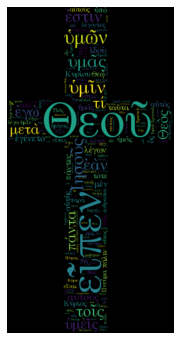

In [19]:
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud_cruz, interpolation='bilinear')
ax.set_axis_off()

In [20]:
wordcloud_cruz.to_file("wordcloud_cruz.png")